In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sheet_names = ['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007']
sheets_dict = pd.read_excel("../Resources/Raw Data/2007-2023_HIC_byState.xlsx", sheet_name=sheet_names, skiprows=1)

In [3]:
common_columns = set(sheets_dict[sheet_names[0]].columns)
for sheet_name in sheet_names[1:]:
    common_columns.intersection_update(sheets_dict[sheet_name].columns)

common_columns = list(common_columns)

for year, df in sheets_dict.items():
    sheets_dict[year] = df[common_columns].copy()

In [4]:
sheets_dict['2023'].head()

,"Total Beds ES, TH, PSH",State
0,3413,AK
1,4490,AL
2,3036,AR
3,17292,AZ
4,145566,CA


In [5]:
for year, df in sheets_dict.items():
    df['Year'] = int(year)  

combined_beds_df = pd.concat(sheets_dict.values(), ignore_index=True)

In [6]:
combined_beds_df = combined_beds_df[~combined_beds_df['State'].isin(['MP', 'AS', 'PR', 'VI', 'GU', 'AK', 'DC', 'HI', 'Total'])]
combined_beds_df['Year'] = pd.to_numeric(combined_beds_df['Year'], errors='coerce')
combined_beds_df.dropna(subset=['Year'], inplace=True)
combined_beds_df['Year'] = combined_beds_df['Year'].astype(int)

In [7]:
combined_beds_df.reset_index(drop=True, inplace=True)

In [8]:
combined_beds_df.head()

,"Total Beds ES, TH, PSH",State,Year
0,4490,AL,2023
1,3036,AR,2023
2,17292,AZ,2023
3,145566,CA,2023
4,15755,CO,2023


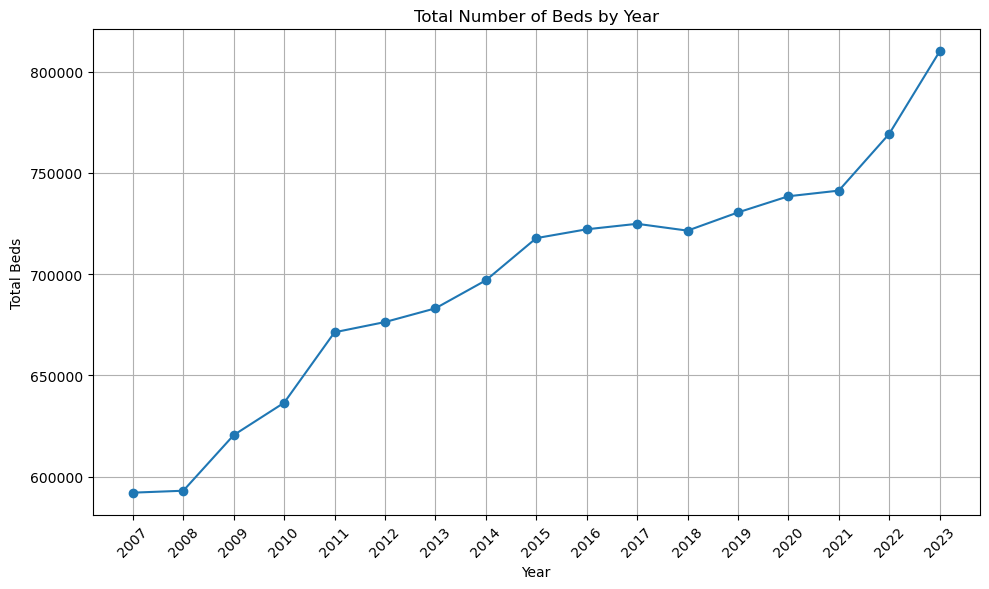

In [11]:
yearly_beds = combined_beds_df.groupby('Year')['Total Beds ES, TH, PSH'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_beds['Year'], yearly_beds['Total Beds ES, TH, PSH'], marker='o', linestyle='-')
plt.title('Total Number of Beds by Year')
plt.xlabel('Year')
plt.ylabel('Total Beds')
plt.grid(True)
plt.xticks(yearly_beds['Year'], rotation=45) 
plt.tight_layout() 


plt.show()

In [16]:
if 'State' in combined_beds_df.columns:
    combined_beds_df = pd.get_dummies(combined_beds_df, columns=['State'])

X = combined_beds_df.drop('Total Beds ES, TH, PSH', axis=1)
y = combined_beds_df['Total Beds ES, TH, PSH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 16441301.8171744
R-squared: 0.9410124776710587


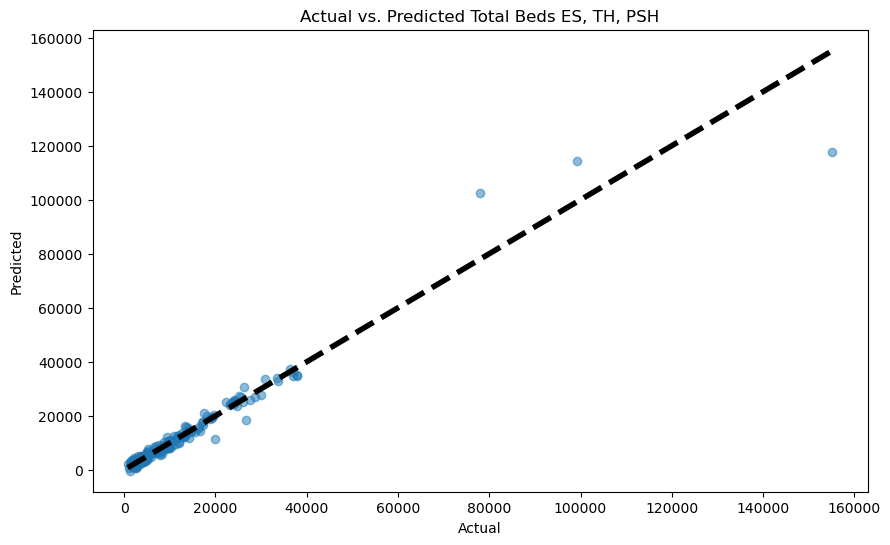

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Total Beds ES, TH, PSH')
plt.show()